Ex.1
• Load the thermal image 'FLIR_00021.jpeg’
• Let’s suppose that the temperature corresponds to 0.1*pixel value
• Display the image using a diverging colormap centered at 12 degrees, mapping the
colormap in the range 4-20 degrees
• Add contours corresponding to 4,8,12,16,20 degrees

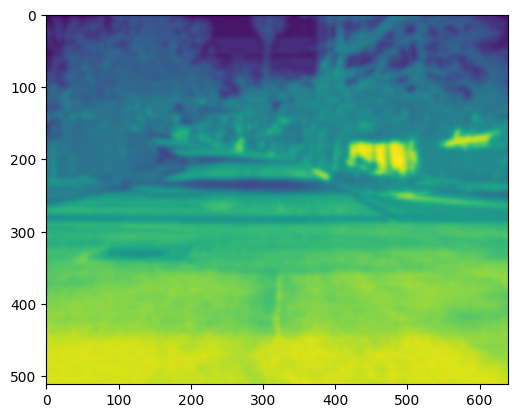

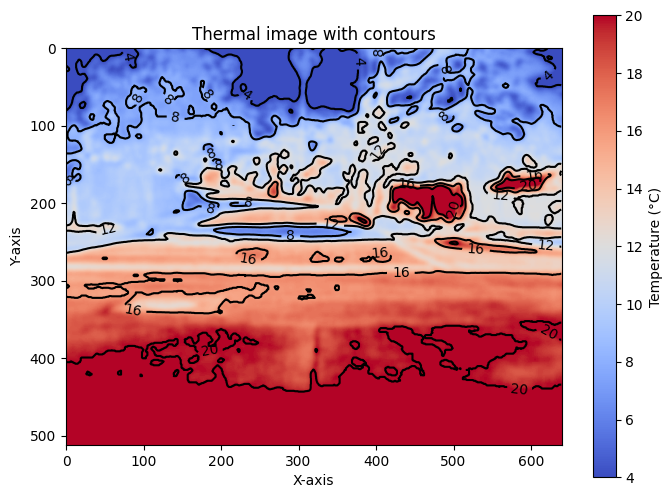

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img= mpimg.imread('FLIR_00021.jpeg')
plt.imshow(img)
temperature=0.1*img
plt.figure(figsize=(8,6))
colormap=plt.get_cmap('coolwarm')
temperature_range=(4,20)
plt.imshow(temperature,cmap=colormap,vmin=temperature_range[0],vmax=temperature_range[1])
plt.colorbar(label='Temperature (°C)')

countours_levels=[4,8,12,16,20]
countours=plt.contour(temperature,levels=countours_levels,colors='black')
plt.clabel(countours,fontsize=10)
plt.title('Thermal image with contours')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Ex. 2
• The file limits_IT_province.geojson includes the contour of all the Italian
administrative districts called "province"
• The file polveri.csv includes the data about pollution captured by different sensors
in the province of Veneto (the region including Verona) in different years (number
of days in which the value of fine dust exceeded the limit)
• Task:
• compute the average values measured by the different sensors for each “provincia” in
2022 and 2012
• create a choropleth map with each “provincia” is represented with a categorical color
• add a symbol map (scattered_geo) with dot size representing the average number of days
over limits in 2022 and color representing the increase/decrease with respect to 2012
(think of an optimal colormap to highlight improvements/deteriorations)

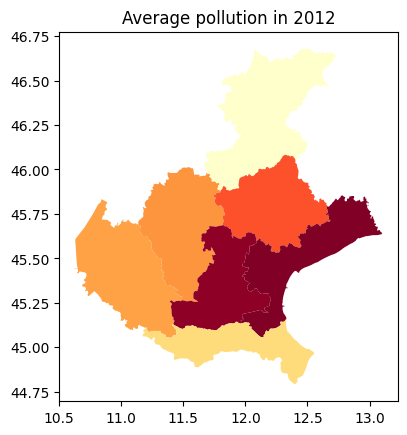

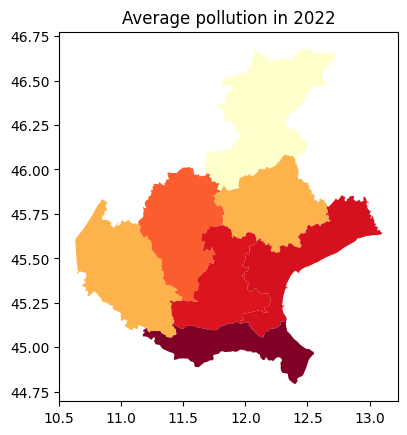

In [88]:
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd

geo_data=pd.read_csv("polveri.csv")
geo_data2022=geo_data[['Provincia','2022']]
geo_data2012=geo_data[['Provincia','2012']]
avg_2022=geo_data2022.groupby('Provincia')['2022'].mean()
avg_2012=geo_data2012.groupby("Provincia")['2012'].mean()

avg_geo_data=pd.DataFrame({"2022":avg_2022,"2012":avg_2012})
avg_geo_data['difference']=avg_geo_data['2022']-avg_geo_data['2012']
provinces=gpd.read_file("limits_IT_provinces.geojson")
provinces.head()
provinces=provinces.merge(avg_geo_data,left_on='prov_name',right_index=True)
provinces.head()
provinces.plot(column='2012',cmap='YlOrRd')
plt.title('Average pollution in 2012')
plt.show()
provinces.plot(column='2022',cmap='YlOrRd')
plt.title('Average pollution in 2022')
plt.show()



In [90]:
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd

provinces2=gpd.read_file("limits_IT_provinces.geojson")
provinces2=provinces2.merge(avg_geo_data,left_on='prov_name',right_index=True)
provinces2.head()

provinces2['centroid']=provinces2.geometry.centroid
provinces2['lat']=provinces2['centroid'].y
provinces2['lon']=provinces2['centroid'].x
fig=px.scatter_geo(provinces2,lat='lat',lon='lon',size="2022",color="difference",color_continuous_scale='YlGnBu',title='Symbol Map')
fig.update_geos(scope='europe')
fig.show()

   prov_name  prov_istat_code_num prov_acr reg_name reg_istat_code  \
23    Verona                   23       VR   Veneto             05   
24   Vicenza                   24       VI   Veneto             05   
25   Belluno                   25       BL   Veneto             05   
26   Treviso                   26       TV   Veneto             05   
27   Venezia                   27       VE   Veneto             05   

    reg_istat_code_num prov_istat_code  \
23                   5             023   
24                   5             024   
25                   5             025   
26                   5             026   
27                   5             027   

                                             geometry       2022  2012  \
23  POLYGON ((11.33151 45.38763, 11.33084 45.38717...  18.000000  24.0   
24  POLYGON ((11.61227 45.3254, 11.61449 45.31729,...  19.750000  24.5   
25  POLYGON ((11.94587 45.90805, 11.95053 45.89579...  15.000000  19.5   
26  POLYGON ((11.80324 45.7999

<ipython-input-90-10fe83e31047>:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


